In [139]:
#NMC method

"""
Load:
  x_a_init.txt
Save:
  x_b.txt
  x_a.txt
"""
import numpy as np
from scipy.integrate import ode
import lorenz96
import matplotlib.pyplot as plt
from settings import *
import matplotlib.pyplot as plt
import numpy.ma as ma
nT = 800

#set random seed
np.random.seed(201910)

#load true value
x_t_save = np.genfromtxt('x_t.txt')
#print(x_t_save[0])


# load initial condition
x_a_init = np.genfromtxt('x_a_init.txt')
analysis_error = 25.e-2
#x_a_init = np.genfromtxt('x_t.txt')[800] + analysis_error * np.random.randn(N)  # using nature run value plus a small error (for test purpose)
#print(x_a_init[:])

np.random.seed(20191031)
# create observations

observation_error = 25.e-2
y_o_save = np.zeros([nT+1, N])
y_o_save = x_t_save + observation_error * np.random.randn(nT+1, N)
#print(y_o_save[0])

# initial x_b: no values at the initial time (assign NaN)
x_b_save = np.full((1,N), np.nan, dtype='f8')
x_12_save = np.full((3,N), np.nan, dtype='f8')
x_24_save = np.full((5,N), np.nan, dtype='f8')
##print(x_b_save)
# initial x_a: from x_a_ens_init

x_a_save = np.array([x_a_init])
##print(x_a_save)


tt = 1

B = 0.12 * np.identity(40)#backound error covariance 
R = 0.25 * np.identity(40) #observation error covariance


while tt <= nT:
    tts = tt - 1
    Ts = tts * dT  # forecast start time
    Ta = tt  * dT  # forecast end time (DA analysis time)
    T_12 = (tt+2)  * dT
    T_24 = (tt+4)  * dT
    print('Cycle =', tt, ', Ts =', round(Ts, 10), ', Ta =', round(Ta, 10))

    #--------------
    # forecast step
    #--------------

    solver = ode(lorenz96.f).set_integrator('dopri5')
    solver.set_initial_value(x_a_save[tts], Ts).set_f_params(F)
    solver.integrate(Ta)
    x_b_save = np.vstack([x_b_save, [solver.y]])
    if T_12 <=nT*dT:
        solver.integrate(T_12)
        x_12_save = np.vstack([x_12_save, [solver.y]])
    if T_24 <=nT*dT:
        solver.integrate(T_24)
        x_24_save = np.vstack([x_24_save, [solver.y]])
    
    
    #solver.integrate(T_24)
    #x_24_save = np.vstack([x_24_save, [solver.y]])
    
    
    #--------------
    # analysis step
    #--------------

    # background
    #print(x_b_save[tt])
    x_b = x_b_save[tt].transpose()

    # observation

    # innovation
    y_o = y_o_save[tt].transpose()
    H = np.identity(40)
    y_b = np.dot(H, x_b)
    d = y_o - y_b

    # analysis scheme 
    K = np.dot(B, np.dot(H, np.linalg.inv(np.dot(H, np.dot(B,H))+R)))

    x_a = x_b + np.dot(K,d)
    #x_a = (x_b + y_o)/2
    
    x_a_save = np.vstack([x_a_save, x_a.transpose()])
    #print(x_a_save)
    tt += 1

# save background and analysis data
np.savetxt('x_b.txt', x_b_save)
np.savetxt('x_a.txt', x_a_save)


Cycle = 1 , Ts = 0.0 , Ta = 0.05
Cycle = 2 , Ts = 0.05 , Ta = 0.1
Cycle = 3 , Ts = 0.1 , Ta = 0.15
Cycle = 4 , Ts = 0.15 , Ta = 0.2
Cycle = 5 , Ts = 0.2 , Ta = 0.25
Cycle = 6 , Ts = 0.25 , Ta = 0.3
Cycle = 7 , Ts = 0.3 , Ta = 0.35
Cycle = 8 , Ts = 0.35 , Ta = 0.4
Cycle = 9 , Ts = 0.4 , Ta = 0.45
Cycle = 10 , Ts = 0.45 , Ta = 0.5
Cycle = 11 , Ts = 0.5 , Ta = 0.55
Cycle = 12 , Ts = 0.55 , Ta = 0.6
Cycle = 13 , Ts = 0.6 , Ta = 0.65
Cycle = 14 , Ts = 0.65 , Ta = 0.7
Cycle = 15 , Ts = 0.7 , Ta = 0.75
Cycle = 16 , Ts = 0.75 , Ta = 0.8
Cycle = 17 , Ts = 0.8 , Ta = 0.85
Cycle = 18 , Ts = 0.85 , Ta = 0.9
Cycle = 19 , Ts = 0.9 , Ta = 0.95
Cycle = 20 , Ts = 0.95 , Ta = 1.0
Cycle = 21 , Ts = 1.0 , Ta = 1.05
Cycle = 22 , Ts = 1.05 , Ta = 1.1
Cycle = 23 , Ts = 1.1 , Ta = 1.15
Cycle = 24 , Ts = 1.15 , Ta = 1.2
Cycle = 25 , Ts = 1.2 , Ta = 1.25
Cycle = 26 , Ts = 1.25 , Ta = 1.3
Cycle = 27 , Ts = 1.3 , Ta = 1.35
Cycle = 28 , Ts = 1.35 , Ta = 1.4
Cycle = 29 , Ts = 1.4 , Ta = 1.45
Cycle = 30 , Ts = 1.45 

Cycle = 240 , Ts = 11.95 , Ta = 12.0
Cycle = 241 , Ts = 12.0 , Ta = 12.05
Cycle = 242 , Ts = 12.05 , Ta = 12.1
Cycle = 243 , Ts = 12.1 , Ta = 12.15
Cycle = 244 , Ts = 12.15 , Ta = 12.2
Cycle = 245 , Ts = 12.2 , Ta = 12.25
Cycle = 246 , Ts = 12.25 , Ta = 12.3
Cycle = 247 , Ts = 12.3 , Ta = 12.35
Cycle = 248 , Ts = 12.35 , Ta = 12.4
Cycle = 249 , Ts = 12.4 , Ta = 12.45
Cycle = 250 , Ts = 12.45 , Ta = 12.5
Cycle = 251 , Ts = 12.5 , Ta = 12.55
Cycle = 252 , Ts = 12.55 , Ta = 12.6
Cycle = 253 , Ts = 12.6 , Ta = 12.65
Cycle = 254 , Ts = 12.65 , Ta = 12.7
Cycle = 255 , Ts = 12.7 , Ta = 12.75
Cycle = 256 , Ts = 12.75 , Ta = 12.8
Cycle = 257 , Ts = 12.8 , Ta = 12.85
Cycle = 258 , Ts = 12.85 , Ta = 12.9
Cycle = 259 , Ts = 12.9 , Ta = 12.95
Cycle = 260 , Ts = 12.95 , Ta = 13.0
Cycle = 261 , Ts = 13.0 , Ta = 13.05
Cycle = 262 , Ts = 13.05 , Ta = 13.1
Cycle = 263 , Ts = 13.1 , Ta = 13.15
Cycle = 264 , Ts = 13.15 , Ta = 13.2
Cycle = 265 , Ts = 13.2 , Ta = 13.25
Cycle = 266 , Ts = 13.25 , Ta = 13.3
C

Cycle = 461 , Ts = 23.0 , Ta = 23.05
Cycle = 462 , Ts = 23.05 , Ta = 23.1
Cycle = 463 , Ts = 23.1 , Ta = 23.15
Cycle = 464 , Ts = 23.15 , Ta = 23.2
Cycle = 465 , Ts = 23.2 , Ta = 23.25
Cycle = 466 , Ts = 23.25 , Ta = 23.3
Cycle = 467 , Ts = 23.3 , Ta = 23.35
Cycle = 468 , Ts = 23.35 , Ta = 23.4
Cycle = 469 , Ts = 23.4 , Ta = 23.45
Cycle = 470 , Ts = 23.45 , Ta = 23.5
Cycle = 471 , Ts = 23.5 , Ta = 23.55
Cycle = 472 , Ts = 23.55 , Ta = 23.6
Cycle = 473 , Ts = 23.6 , Ta = 23.65
Cycle = 474 , Ts = 23.65 , Ta = 23.7
Cycle = 475 , Ts = 23.7 , Ta = 23.75
Cycle = 476 , Ts = 23.75 , Ta = 23.8
Cycle = 477 , Ts = 23.8 , Ta = 23.85
Cycle = 478 , Ts = 23.85 , Ta = 23.9
Cycle = 479 , Ts = 23.9 , Ta = 23.95
Cycle = 480 , Ts = 23.95 , Ta = 24.0
Cycle = 481 , Ts = 24.0 , Ta = 24.05
Cycle = 482 , Ts = 24.05 , Ta = 24.1
Cycle = 483 , Ts = 24.1 , Ta = 24.15
Cycle = 484 , Ts = 24.15 , Ta = 24.2
Cycle = 485 , Ts = 24.2 , Ta = 24.25
Cycle = 486 , Ts = 24.25 , Ta = 24.3
Cycle = 487 , Ts = 24.3 , Ta = 24.35
C

Cycle = 697 , Ts = 34.8 , Ta = 34.85
Cycle = 698 , Ts = 34.85 , Ta = 34.9
Cycle = 699 , Ts = 34.9 , Ta = 34.95
Cycle = 700 , Ts = 34.95 , Ta = 35.0
Cycle = 701 , Ts = 35.0 , Ta = 35.05
Cycle = 702 , Ts = 35.05 , Ta = 35.1
Cycle = 703 , Ts = 35.1 , Ta = 35.15
Cycle = 704 , Ts = 35.15 , Ta = 35.2
Cycle = 705 , Ts = 35.2 , Ta = 35.25
Cycle = 706 , Ts = 35.25 , Ta = 35.3
Cycle = 707 , Ts = 35.3 , Ta = 35.35
Cycle = 708 , Ts = 35.35 , Ta = 35.4
Cycle = 709 , Ts = 35.4 , Ta = 35.45
Cycle = 710 , Ts = 35.45 , Ta = 35.5
Cycle = 711 , Ts = 35.5 , Ta = 35.55
Cycle = 712 , Ts = 35.55 , Ta = 35.6
Cycle = 713 , Ts = 35.6 , Ta = 35.65
Cycle = 714 , Ts = 35.65 , Ta = 35.7
Cycle = 715 , Ts = 35.7 , Ta = 35.75
Cycle = 716 , Ts = 35.75 , Ta = 35.8
Cycle = 717 , Ts = 35.8 , Ta = 35.85
Cycle = 718 , Ts = 35.85 , Ta = 35.9
Cycle = 719 , Ts = 35.9 , Ta = 35.95
Cycle = 720 , Ts = 35.95 , Ta = 36.0
Cycle = 721 , Ts = 36.0 , Ta = 36.05
Cycle = 722 , Ts = 36.05 , Ta = 36.1
Cycle = 723 , Ts = 36.1 , Ta = 36.15
C

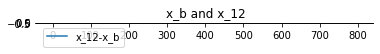

In [140]:
plt.plot(x_12_save[:,0]-x_b_save[:,0], label ="x_12-x_b" )
#plt.plot(x_12_save[:,0], label = "x_12")
plt.ylim(-0.5,0.5)
plt.legend(loc="upper left")
plt.title("x_b and x_12")
plt.show()

In [141]:
print(np.std(x_12_save[10:799,0]-x_b_save[10:799,0]))

0.1295214894246375


In [142]:
print(np.std(x_24_save[10:799,0]-x_b_save[10:799,0]))

0.1865222693128833


In [143]:
j = 0
nmc_24 = np.zeros((40,40))
nmc_12 = np.zeros((40,40))
nmc_1224 = np.zeros((40,40))

for i in range(10,799):
    j=j+1
    #print()
    nmc_12_i = np.reshape(x_12_save[i,:]-x_b_save[i,:],(40,1))
    nmc_12 = nmc_12 + np.matmul(nmc_12_i,np.transpose(nmc_12_i))
    nmc_24_i = np.reshape(x_24_save[i,:]-x_b_save[i,:],(40,1))
    nmc_24 = nmc_24 + np.matmul(nmc_24_i,np.transpose(nmc_24_i))
    nmc_1224_i = np.reshape(x_24_save[i,:]-x_12_save[i,:],(40,1))
    nmc_1224 = nmc_1224 + np.matmul(nmc_1224_i,np.transpose(nmc_1224_i))

0.08442504266478386
40


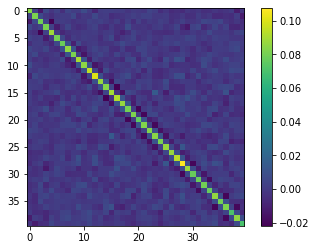

0.09905019045310196
40


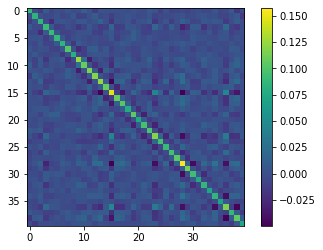

0.13832461468917065
40


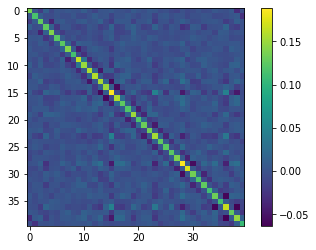

0.01221365994533795


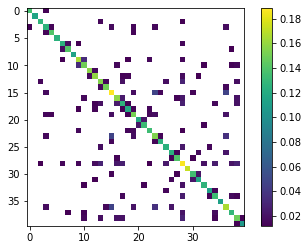

In [145]:
B_12 = nmc_12/j*5
print(np.sum(B_12[B_12>0.07]/B_12[B_12>0.07].size))
print(B_12[B_12>0.07].size)

plt.imshow(B_12)
plt.colorbar()
plt.show()

B_24 = nmc_24/j*2.5
print(np.sum(B_24[B_24>0.07]/B_24[B_24>0.07].size))
print(B_24[B_24>0.07].size)

plt.imshow(B_24)
plt.colorbar()
plt.show()

B_1224 = nmc_1224/j*5
print(np.sum(B_1224[B_1224>0.07]/B_1224[B_1224>0.07].size))
print(B_1224[B_1224>0.07].size)

plt.imshow(B_1224)
plt.colorbar()
plt.show()
print(np.std(B_1224[B_1224<0.07]))

B_1224_mask = B_1224 < 0.012 
B_1224_masked = ma.masked_array(B_1224, B_1224_mask)

plt.imshow(B_1224_masked)
plt.colorbar()
plt.show()

In [148]:
B_12_0 = 0
B_12_1 = 0
B_12_2 = 0
B_12_3 = 0
k=0
for i in range(1):
    for j in range(40):
        i=j
        B_12_0= B_12_0 + B_12[i][j]
        if j+1<40:
            i=j+1
            B_12_1 = B_12_1 + B_12[i][j]
            k=k+1
            
        else:
            i=j+1
            B_12_1 = B_12_1 + B_12[i-40][j]
            k=k+1
            
        if j-1>-1:
            i=j-1 
            B_12_1 = B_12_1 + B_12[i][j]
            k=k+1
        else:
            i=j-1 
            B_12_1 = B_12_1 + B_12[i+40][j]
            k=k+1
            
        if j+1<40 and j+2<40:
            i=j+2
            B_12_2 = B_12_2 + B_12[i][j]
            k=k+1
        else:
            i=j+2
            B_12_2 = B_12_2 + B_12[i-40][j]
            k=k+1
        if j-1>-1 and j-2>-1:
            i=j-2 
            B_12_2 = B_12_2 + B_12[i][j]
            k=k+1
        else:
            i=j-2 
            B_12_2 = B_12_2 + B_12[i+40][j]
            k=k+1
            
        if j+1<40 and j+2<40 and j+3<40:
            i=j+3
            B_12_3 = B_12_3 + B_12[i][j]
            k=k+1
        else:
            i=j+3
            B_12_3 = B_12_3 + B_12[i-40][j]
            k=k+1
        if j-1>-1 and j-2>-1 and j-3>-1:
            i=j-3
            B_12_3 = B_12_3 + B_12[i][j]
            k=k+1
        else:
            i=j-3 
            B_12_3 = B_12_3 + B_12[i+40][j]
            k=k+1
        
print(B_12_0/40)
print(B_12_1/80)
print(B_12_2/80)
print(B_12_3/80)
print(k)

0.08442504266478387
0.006424698703778095
-0.012727285259004614
-0.00036115765939274513
240


In [113]:
np.savetxt('B_12_raw.txt', B_12)
np.savetxt('B_24_raw.txt', B_24)
np.savetxt('B_1224_raw.txt', B_1224)

In [114]:
0.0844/0.138

0.6115942028985507